[Some of the content of this notebook is taken from: Jake VanderPlas' Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/index.html)

# Data Transformations with Pandas-II


__Let's use what we learnt last week__


In [1]:
## import pandas
import pandas as pd
## use the url to read the file

url = 'https://raw.githubusercontent.com/msaricaumbc/DS_data/master/nyc_flights.csv'

## read the file
flights = pd.read_csv(url)

In [2]:
## how many flights are there?
flights.shape


(336776, 19)

In [3]:
## what are the column names?
flights.columns

Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour'],
      dtype='object')

In [4]:
## what are the data types of columns?

flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute    

## Vectorized Operations

Note sometimes we might want to apply some operations between columns or within a column. Because pandas built on `numpy` library such operations are easy with pandas and we will see that `numpy` functions work well with pandas objects.

In [5]:
import numpy as np

## fixing random state so that we got the same number each time 
## fixing the randomness
rng = np.random.RandomState(1)

random_numbers = rng.randint(0, 10, (5,3))
random_numbers

array([[5, 8, 9],
       [5, 0, 0],
       [1, 7, 6],
       [9, 2, 4],
       [5, 2, 4]])

In [6]:
import pandas as pd

## now generate some random numbers and use them to create a dataframe
toy_data = pd.DataFrame(random_numbers, columns= ['A', 'B', 'C'])
toy_data

,A,B,C
0,5,8,9
1,5,0,0
2,1,7,6
3,9,2,4
4,5,2,4


In [7]:
## let's multiply column A with 4

toy_data.A * 4

0    20
1    20
2     4
3    36
4    20
Name: A, dtype: int64

In [8]:
## let's multiply every cell in the dataframe with 4

toy_data * 4

,A,B,C
0,20,32,36
1,20,0,0
2,4,28,24
3,36,8,16
4,20,8,16


In [9]:
## we can add two columns

toy_data.A + toy_data.B

0    13
1     5
2     8
3    11
4     7
dtype: int64

In [10]:
## we can divide two columns

toy_data.A/toy_data.B


0    0.625000
1         inf
2    0.142857
3    4.500000
4    2.500000
dtype: float64

[On np.inf](https://stackoverflow.com/questions/17477979/dropping-infinite-values-from-dataframes-in-pandas)

In [11]:
## we can apply numpy functions to dataframes and columns

np.log(toy_data.A)

0    1.609438
1    1.609438
2    0.000000
3    2.197225
4    1.609438
Name: A, dtype: float64

[More on the topic](https://jakevdp.github.io/PythonDataScienceHandbook/03.03-operations-in-pandas.html)

Let's go back to our `flights` data and use what we learnt:

- Consider the `arr_delay` and `dep_delay` columns. Note that any difference in these columns corresponds to the delays on air. For each flight find this. 

In [12]:
diff = flights.arr_delay-flights.dep_delay
diff_less_than_zero = diff < 0
flights[ diff_less_than_zero ]


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z
7,2013,1,1,557.0,600,-3.0,709.0,723,-14.0,EV,5708,N829AS,LGA,IAD,53.0,229,6,0,2013-01-01T11:00:00Z
8,2013,1,1,557.0,600,-3.0,838.0,846,-8.0,B6,79,N593JB,JFK,MCO,140.0,944,6,0,2013-01-01T11:00:00Z
11,2013,1,1,558.0,600,-2.0,853.0,856,-3.0,B6,71,N657JB,JFK,TPA,158.0,1005,6,0,2013-01-01T11:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336765,2013,9,30,2240.0,2245,-5.0,2334.0,2351,-17.0,B6,1816,N354JB,JFK,SYR,41.0,209,22,45,2013-10-01T02:00:00Z
336766,2013,9,30,2240.0,2250,-10.0,2347.0,7,-20.0,B6,2002,N281JB,JFK,BUF,52.0,301,22,50,2013-10-01T02:00:00Z
336767,2013,9,30,2241.0,2246,-5.0,2345.0,1,-16.0,B6,486,N346JB,JFK,ROC,47.0,264,22,46,2013-10-01T02:00:00Z
336768,2013,9,30,2307.0,2255,12.0,2359.0,2358,1.0,B6,718,N565JB,JFK,BOS,33.0,187,22,55,2013-10-01T02:00:00Z


In [14]:
# or this: (same as above)
# flights[flights.arr_delay - flights.dep_delay <0] 


In addition to basic mathematical operations we can easily use the string methods to `Series` objects in pandas. 

Let's first recall some of the string methods available in Python

In [15]:
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z


In [21]:
text = '  My name is John and by birthdate is 01/01/1960....'

In [22]:
## let's get rid of the white spaces at the beginning and the end of the text
text.strip(' ')

'My name is John and by birthdate is 01/01/1960....'

In [23]:
text.strip('.')

'  My name is John and by birthdate is 01/01/1960'

In [24]:
text.strip('. ')

'My name is John and by birthdate is 01/01/1960'

In [25]:
## we can make all the letters upper case or lower case

text.upper()

'  MY NAME IS JOHN AND BY BIRTHDATE IS 01/01/1960....'

In [26]:
text.lower()

'  my name is john and by birthdate is 01/01/1960....'

In [27]:
# we can also chain methods

text.strip('. ').lower()

'my name is john and by birthdate is 01/01/1960'

In [30]:
## we can check whether the text is starting with certain characters

text.strip().startswith('My')

True

In [31]:
## we can count the number of times a char is appearing in the text
text.count('M')

1

[For more on string methods](https://www.tutorialspoint.com/python-string-methods)

To be able to use these methods with `Series` objects that contains string values we need to use .str method.


Let's check how many of the destination airports startswith the letter 'D'


In [33]:
flights.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            5 non-null      int64  
 1   month           5 non-null      int64  
 2   day             5 non-null      int64  
 3   dep_time        5 non-null      float64
 4   sched_dep_time  5 non-null      int64  
 5   dep_delay       5 non-null      float64
 6   arr_time        5 non-null      float64
 7   sched_arr_time  5 non-null      int64  
 8   arr_delay       5 non-null      float64
 9   carrier         5 non-null      object 
 10  flight          5 non-null      int64  
 11  tailnum         5 non-null      object 
 12  origin          5 non-null      object 
 13  dest            5 non-null      object 
 14  air_time        5 non-null      float64
 15  distance        5 non-null      int64  
 16  hour            5 non-null      int64  
 17  minute          5 non-null      int64  

In [34]:

flights_start_with_d_bool = flights.dest.str.startswith('D')
flights_start_with_d_bool

0         False
1         False
2         False
3         False
4         False
          ...  
336771     True
336772    False
336773    False
336774    False
336775    False
Name: dest, Length: 336776, dtype: bool

In [35]:
flights_start_with_d = flights[flights_start_with_d_bool]
flights_start_with_d.shape

(37187, 19)

In [36]:
flights_start_with_d.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
14,2013,1,1,559.0,600,-1.0,941.0,910,31.0,AA,707,N3DUAA,LGA,DFW,257.0,1389,6,0,2013-01-01T11:00:00Z
21,2013,1,1,602.0,605,-3.0,821.0,805,16.0,MQ,4401,N730MQ,LGA,DTW,105.0,502,6,5,2013-01-01T11:00:00Z
42,2013,1,1,635.0,635,0.0,1028.0,940,48.0,AA,711,N3GKAA,LGA,DFW,248.0,1389,6,35,2013-01-01T11:00:00Z
49,2013,1,1,646.0,645,1.0,910.0,916,-6.0,UA,883,N569UA,LGA,DEN,243.0,1620,6,45,2013-01-01T11:00:00Z
66,2013,1,1,659.0,705,-6.0,907.0,913,-6.0,DL,831,N998DL,LGA,DTW,105.0,502,7,5,2013-01-01T12:00:00Z


In [37]:
flights_start_with_d.dest.unique()

array(['DFW', 'DTW', 'DEN', 'DCA', 'DAY', 'DSM'], dtype=object)


- Strip all the white spaces in `origin` column if any
- Convert all the `origin` airports to lower letter case.

In [43]:
# let's do it together! 

flights.origin.str.strip().str.lower()

0         ewr
1         lga
2         jfk
3         jfk
4         lga
         ... 
336771    jfk
336772    lga
336773    lga
336774    lga
336775    lga
Name: origin, Length: 336776, dtype: object

## Group_By method: Basics

Sometimes we might need to group the rows with the values from certain columns

In [44]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(1,7)}, columns=['key', 'data'])
df

,key,data
0,A,1
1,B,2
2,C,3
3,A,4
4,B,5
5,C,6


In [45]:
grouped_df = df.groupby('key')
grouped_df

In [47]:
for key, group in grouped_df:
    print(key)
    print(group, "\n")

A
  key  data
0   A     1
3   A     4 

B
  key  data
1   B     2
4   B     5 

C
  key  data
2   C     3
5   C     6 



In [48]:
grouped_df.count()

,data
key,
A,2
B,2
C,2


In [49]:
grouped_df.data

In [51]:
# dir(grouped_df.data)

In [52]:
grouped_df.data.min()

key
A    1
B    2
C    3
Name: data, dtype: int64

In [53]:
grouped_df.data.mean()

key
A    2.5
B    3.5
C    4.5
Name: data, dtype: float64

__What is happening under the hood__

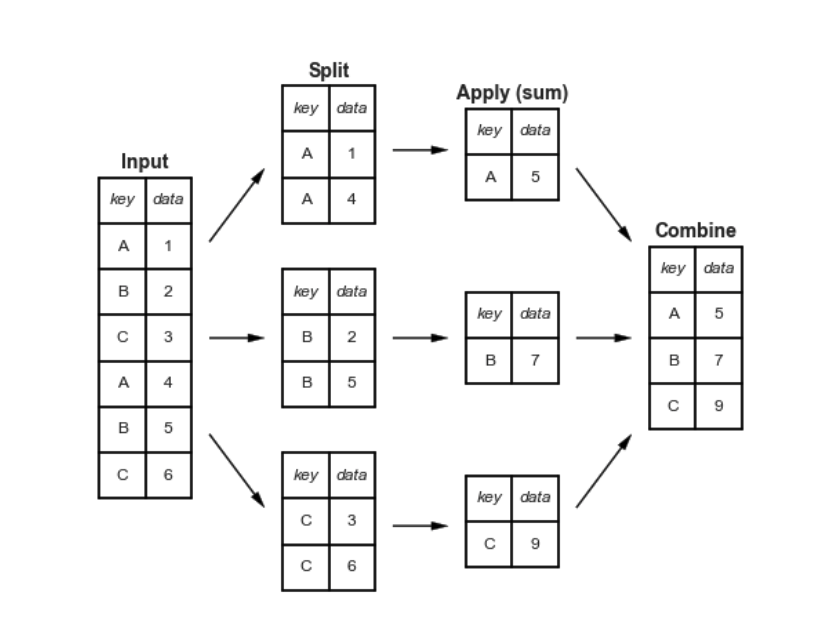

[Figure Source](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html#Split,-apply,-combine)

For example let's take a look at whether there is any difference in the dep_delay times with respect to origin airport

In [56]:
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z


In [59]:
flights.groupby('origin').dep_delay.mean()

origin
EWR    15.107954
JFK    12.112159
LGA    10.346876
Name: dep_delay, dtype: float64

We can work on specific groups!

In [61]:
grouped = flights.groupby('origin')

In [63]:
# grouped.groups

In [65]:
grouped.get_group('JFK').head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
8,2013,1,1,557.0,600,-3.0,838.0,846,-8.0,B6,79,N593JB,JFK,MCO,140.0,944,6,0,2013-01-01T11:00:00Z
10,2013,1,1,558.0,600,-2.0,849.0,851,-2.0,B6,49,N793JB,JFK,PBI,149.0,1028,6,0,2013-01-01T11:00:00Z
11,2013,1,1,558.0,600,-2.0,853.0,856,-3.0,B6,71,N657JB,JFK,TPA,158.0,1005,6,0,2013-01-01T11:00:00Z



- Now can you find the average `dep_delay` times by destinations

- Keep the result in variable called `delays_destination`

In [66]:
## let's do it together

delays_destination = flights.groupby('dest').dep_delay.mean()
delays_destination

dest
ABQ    13.740157
ACK     6.456604
ALB    23.620525
ANC    12.875000
ATL    12.509824
         ...    
TPA    12.135007
TUL    34.906355
TVC    22.083333
TYS    28.493955
XNA     6.464886
Name: dep_delay, Length: 105, dtype: float64

Let's visualize this

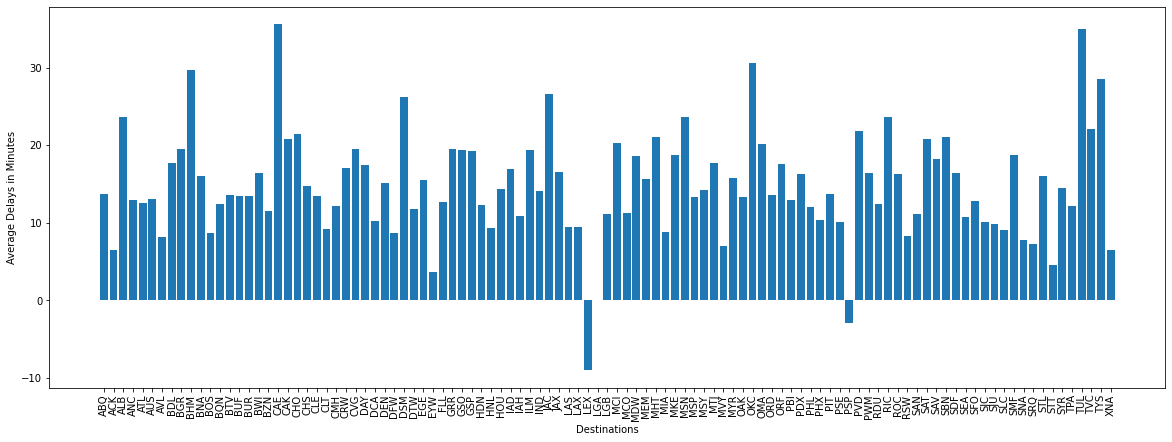

In [72]:
import matplotlib.pyplot as plt

# figure size
plt.figure(figsize = (20, 7))

# Histogram
plt.bar(delays_destination.index, delays_destination.values)

# x-label
plt.xlabel('Destinations')

# y-label
plt.ylabel('Average Delays in Minutes')

plt.xticks(rotation = 90)

plt.show()

Let's take a look at the destinations with avg delay is more than 25

In [73]:
delays_destination[delays_destination >25]


dest
BHM    29.694853
CAE    35.570093
DSM    26.232955
JAC    26.545455
OKC    30.568807
TUL    34.906355
TYS    28.493955
Name: dep_delay, dtype: float64

Do you see any pattern?

__BHM__: [Birmingham-AL](https://goo.gl/maps/9UHiEJxrjQCZkbim7)

__CAE__: [Columbia-SC](https://goo.gl/maps/HzF1ZSQyWz4LoxTi6)

__DSM__: [Des Moines - IO](https://goo.gl/maps/3EgkwDpfYKo6Yngv5)

__JAC__: [Jackson - WY](https://goo.gl/maps/CESs8scrCM5GWAda8)

__OKC__: [Oklahoma City - OK](https://goo.gl/maps/DfUEo7r9tV3FEzKq7)

__TUL__: [Tulsa - OK](https://goo.gl/maps/xuArw3CEjHh4zh5R6)

__TYS__: [Knoxville - TN](https://goo.gl/maps/5cyYPi2xZhdiADkDA)


## Aggregation

- I would like to hypothesize that these airports have less air-traffic then some other airports. To be able to see this, I need to group my data with `destinations` and then take the `mean` of `dep_delay` and `count` of `dest`.

- To achieve our goal quickly we can use `aggregate` method.

In [74]:
## First create a dictionary with column to method
agg_dict = {
    'dest': 'count',
    'dep_delay': 'mean' 
}


In [75]:
## use the dictionary we created above in .aggregate method
aggregated_df = flights.groupby('dest').aggregate(agg_dict)
aggregated_df

,dest,dep_delay
dest,,
ABQ,254,13.740157
ACK,265,6.456604
ALB,439,23.620525
ANC,8,12.875000
ATL,17215,12.509824
...,...,...
TPA,7466,12.135007
TUL,315,34.906355
TVC,101,22.083333


__Let's check our hypothesis:__

In [88]:
## check the values with destinations with more than 25mins average delay
aggregated_df[aggregated_df.dep_delay >25]

,dest,dep_delay,dest1
dest,,,
BHM,297,29.694853,297
CAE,116,35.570093,116
DSM,569,26.232955,569
JAC,25,26.545455,25
OKC,346,30.568807,346
TUL,315,34.906355,315
TYS,631,28.493955,631


Note that the count is 631 for the `TYS` see how many other destinations have less than this value as their flights count.


In [89]:
aggregated_df[aggregated_df.dest <631].shape

(36, 3)

Only 36 of the destinations got less flights from NYC airports than the destinations of those fligths with more than 25 mins average delay_time. In this data we have 105 different destinations total.

### Aggregation and naming columns of the resulting table

In [93]:
# type(aggregated_df)

In [91]:
## Note that the following code is not working

# aggregated_df.sort_values(by = 'dest')

Sometimes we might want to give names to columns after the aggregation. Here is how you can achive this.

In [111]:
## Renaming Aggregated Column Names

grouped_by_dest = flights.groupby('dest').agg(
    flight_counts = ('dest', 'count') , 
    delay_mean= ('dep_delay', 'mean') ,
    distance_mean = ('distance', 'mean')
    )
grouped_by_dest

,flight_counts,delay_mean,distance_mean
dest,,,
ABQ,254,13.740157,1826.000000
ACK,265,6.456604,199.000000
ALB,439,23.620525,143.000000
ANC,8,12.875000,3370.000000
ATL,17215,12.509824,757.108220
...,...,...,...
TPA,7466,12.135007,1003.935575
TUL,315,34.906355,1215.000000
TVC,101,22.083333,652.386139


### User defined functions

Finally we can use user-defined functions for aggregation

In [130]:
# define my_avg_funct
def my_avg_func(x):
#     print('------------')
#     print(x)
    return x.mean()

def sk(x):
#     print('---')
#     print(x)
#     print(','.join(x.unique()))
    return ','.join(x.unique())

# show that we can use my_avg_func instead of 'mean'
grouped_by_dest = flights.groupby('dest').agg(
    flight_counts = ('dest', 'count') , 
    delay_mean= ('dep_delay', 'mean') ,
    distance_mean = ('distance', my_avg_func),
    custom = ('origin', sk)
    )
grouped_by_dest

## we can also use built-in functions from other libraries
## especially from numpy

,flight_counts,delay_mean,distance_mean,custom
dest,,,,
ABQ,254,13.740157,1826.000000,JFK
ACK,265,6.456604,199.000000,JFK
ALB,439,23.620525,143.000000,EWR
ANC,8,12.875000,3370.000000,EWR
ATL,17215,12.509824,757.108220,"LGA,JFK,EWR"
...,...,...,...,...
TPA,7466,12.135007,1003.935575,"JFK,EWR,LGA"
TUL,315,34.906355,1215.000000,EWR
TVC,101,22.083333,652.386139,"LGA,EWR"


In [131]:
## we can also use the .agg method in this way

flights.groupby('dest').dep_delay.agg(['mean', 'count', my_avg_func])


,mean,count,my_avg_func
dest,,,
ABQ,13.740157,254,13.740157
ACK,6.456604,265,6.456604
ALB,23.620525,419,23.620525
ANC,12.875000,8,12.875000
ATL,12.509824,16898,12.509824
...,...,...,...
TPA,12.135007,7407,12.135007
TUL,34.906355,299,34.906355
TVC,22.083333,96,22.083333


## Grouping by multiple variables

Sometimes we will group rows using more than one variables.

Let's group all the flight by using both origin and destination of the flights store the result in a variable named `multiple_grouped`


In [132]:
# if you want to goto the next line use \

multiple_grouped = flights \
    .groupby(['origin', 'dest']) \
    .agg({'dest':'count', 'dep_delay': 'mean'})

multiple_grouped

dest  dep_delay
origin dest                 
EWR    ALB    439  23.620525
       ANC      8  12.875000
       ATL   5022  15.501738
       AUS    968  11.508863
       AVL    265   8.616601
...           ...        ...
LGA    SYR    293  19.110701
       TPA   2145  11.287324
       TVC     77  23.410959
       TYS    308  12.705660
       XNA    745   5.933793

[224 rows x 2 columns]

Now we can access a group by usign its multiple index:

In [133]:
## get the group with 'EWR'
multiple_grouped.loc['EWR']

,dest,dep_delay
dest,,
ALB,439,23.620525
ANC,8,12.875000
ATL,5022,15.501738
AUS,968,11.508863
AVL,265,8.616601
...,...,...
TPA,2334,13.068505
TUL,315,34.906355
TVC,24,17.869565


In [134]:
## get the group with ('EWR', 'ALB')
multiple_grouped.loc[('EWR', 'ALB')]


dest         439.000000
dep_delay     23.620525
Name: (EWR, ALB), dtype: float64

In [135]:
multiple_grouped.loc[('JFK', 'BOS')]

dest         5898.000000
dep_delay      11.694953
Name: (JFK, BOS), dtype: float64

## Filtering

A filtering operation allows you to drop data based on the group properties. 

Define a function that checks whether for a given group the mean delay time is more than 25 mins

In [136]:
def my_delay_func(group):
    return group.dep_delay.mean() > 25

## use my_delay_func to .filter the original dataframe
filtered_by_delay = flights.groupby('dest').filter(my_delay_func)
filtered_by_delay

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
152,2013,1,1,848.0,851,-3.0,1155.0,1136,19.0,UA,1741,N27724,EWR,JAC,275.0,1874,8,51,2013-01-01T13:00:00Z
733,2013,1,1,1952.0,1930,22.0,2358.0,2207,NaN,EV,4333,N11194,EWR,TUL,NaN,1215,19,30,2013-01-02T00:00:00Z
742,2013,1,1,2000.0,1930,30.0,2255.0,2140,75.0,EV,4361,N12567,EWR,TYS,138.0,631,19,30,2013-01-02T00:00:00Z
754,2013,1,1,2016.0,1930,46.0,NaN,2220,NaN,EV,4204,N14168,EWR,OKC,NaN,1325,19,30,2013-01-02T00:00:00Z
803,2013,1,1,2119.0,1930,109.0,2358.0,2136,142.0,EV,4543,N13123,EWR,DSM,200.0,1017,19,30,2013-01-02T00:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336659,2013,9,30,1939.0,1950,-11.0,2112.0,2141,-29.0,EV,5038,N713EV,LGA,BHM,112.0,866,19,50,2013-09-30T23:00:00Z
336677,2013,9,30,2000.0,2007,-7.0,2142.0,2202,-20.0,EV,4543,N11194,EWR,DSM,138.0,1017,20,7,2013-10-01T00:00:00Z
336707,2013,9,30,2031.0,2040,-9.0,2228.0,2300,-32.0,9E,4033,N8924B,LGA,TYS,86.0,647,20,40,2013-10-01T00:00:00Z
336731,2013,9,30,2059.0,2003,56.0,2311.0,2237,34.0,EV,4204,N11127,EWR,OKC,166.0,1325,20,3,2013-10-01T00:00:00Z


Note that this is not equal to getting all flights whose delay time is more than 25 mins.

In [137]:
# return all the flights with more than 25 mins delay
flights[flights.dep_delay > 25]


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
85,2013,1,1,732.0,645,47.0,1011.0,941,30.0,UA,1111,N37456,EWR,MCO,145.0,937,6,45,2013-01-01T11:00:00Z
96,2013,1,1,749.0,710,39.0,939.0,850,49.0,MQ,3737,N508MQ,EWR,ORD,148.0,719,7,10,2013-01-01T12:00:00Z
119,2013,1,1,811.0,630,101.0,1047.0,830,137.0,MQ,4576,N531MQ,LGA,CLT,118.0,544,6,30,2013-01-01T11:00:00Z
135,2013,1,1,826.0,715,71.0,1136.0,1045,51.0,AA,443,N3GVAA,JFK,MIA,160.0,1089,7,15,2013-01-01T12:00:00Z
151,2013,1,1,848.0,1835,853.0,1001.0,1950,851.0,MQ,3944,N942MQ,JFK,BWI,41.0,184,18,35,2013-01-01T23:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336757,2013,9,30,2159.0,1845,194.0,2344.0,2030,194.0,9E,3320,N906XJ,JFK,BUF,50.0,301,18,45,2013-09-30T22:00:00Z
336759,2013,9,30,2207.0,2140,27.0,2257.0,2250,7.0,MQ,3660,N532MQ,LGA,BNA,97.0,764,21,40,2013-10-01T01:00:00Z
336760,2013,9,30,2211.0,2059,72.0,2339.0,2242,57.0,EV,4672,N12145,EWR,STL,120.0,872,20,59,2013-10-01T00:00:00Z
336762,2013,9,30,2233.0,2113,80.0,112.0,30,42.0,UA,471,N578UA,EWR,SFO,318.0,2565,21,13,2013-10-01T01:00:00Z


In [138]:
## Show that in `filtered_by_delay` there are some observations that have delay time less than 25 mins.

filtered_by_delay.dep_delay.value_counts()

-5.0      129
-3.0      109
-7.0      106
-4.0      100
-6.0       92
         ... 
 173.0      1
 157.0      1
 175.0      1
 211.0      1
 266.0      1
Name: dep_delay, Length: 231, dtype: int64

__If time allows...__

You can check the code below and see how filter works under the hood:

In [139]:
## when we use groupby method pandas returns a groupby object
grouped = flights.groupby('dest')

## this groupby object has get_group method that allow us to access individual groups

print(grouped.get_group('CAE'))
## note that result is a dataframe

print(type(grouped.get_group('CAE')))

## now we can check the average dep_delay time for this group is bigger than 25 or not

grouped.get_group('CAE').dep_delay.mean() > 25

## Note that the average dep_delay is more than 25
## therefore observations that belong to 'CAE' group will be returned after we filter the dataframe

        year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
2511    2013      1    3    1843.0            1828       15.0    2102.0   
5000    2013      1    6    1839.0            1836        3.0    2118.0   
8654    2013      1   10    1827.0            1828       -1.0    2031.0   
11163   2013      1   13    1958.0            1836       82.0    2231.0   
14837   2013      1   17    2004.0            1828       96.0    2227.0   
...      ...    ...  ...       ...             ...        ...       ...   
322546  2013      9   15    1807.0            1810       -3.0    2044.0   
326428  2013      9   19    1809.0            1757       12.0    1955.0   
329047  2013      9   22    1805.0            1810       -5.0    2021.0   
333052  2013      9   26    1911.0            1745       86.0    2124.0   
335621  2013      9   29    1858.0            1900       -2.0    2059.0   

        sched_arr_time  arr_delay carrier  flight tailnum origin dest  \
2511              2026    

True

In [ ]:
# grouped.groups

In [140]:
## in fact we know from our previous work that the destinations with more than 25 mins 
## delay are ['JAC', 'TUL', 'DSM', 'OKC', 'TYS', 'BHM', 'CAE' ]
## therefore the filtering above is equivalent to the code below but more convenient

flights[flights.dest.isin(['JAC', 'TUL', 'DSM', 'OKC', 'TYS', 'BHM', 'CAE' ])]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
152,2013,1,1,848.0,851,-3.0,1155.0,1136,19.0,UA,1741,N27724,EWR,JAC,275.0,1874,8,51,2013-01-01T13:00:00Z
733,2013,1,1,1952.0,1930,22.0,2358.0,2207,NaN,EV,4333,N11194,EWR,TUL,NaN,1215,19,30,2013-01-02T00:00:00Z
742,2013,1,1,2000.0,1930,30.0,2255.0,2140,75.0,EV,4361,N12567,EWR,TYS,138.0,631,19,30,2013-01-02T00:00:00Z
754,2013,1,1,2016.0,1930,46.0,NaN,2220,NaN,EV,4204,N14168,EWR,OKC,NaN,1325,19,30,2013-01-02T00:00:00Z
803,2013,1,1,2119.0,1930,109.0,2358.0,2136,142.0,EV,4543,N13123,EWR,DSM,200.0,1017,19,30,2013-01-02T00:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336659,2013,9,30,1939.0,1950,-11.0,2112.0,2141,-29.0,EV,5038,N713EV,LGA,BHM,112.0,866,19,50,2013-09-30T23:00:00Z
336677,2013,9,30,2000.0,2007,-7.0,2142.0,2202,-20.0,EV,4543,N11194,EWR,DSM,138.0,1017,20,7,2013-10-01T00:00:00Z
336707,2013,9,30,2031.0,2040,-9.0,2228.0,2300,-32.0,9E,4033,N8924B,LGA,TYS,86.0,647,20,40,2013-10-01T00:00:00Z
336731,2013,9,30,2059.0,2003,56.0,2311.0,2237,34.0,EV,4204,N11127,EWR,OKC,166.0,1325,20,3,2013-10-01T00:00:00Z


## Transform Method

In [141]:
## lets define each flights speed per minute (maybe per hour?)
## keep the column in the dataframe as speed_per_min

flights['speed_per_min'] = flights.distance / flights.air_time

In [142]:
flights.head(2)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,speed_per_min
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z,6.167401
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z,6.237885


Now let's compare each observation with the mean of their destination group.

In [145]:
## create a func that checks the group mean and each observations difference from that mean
def speed_func(group):
    return group - group.mean()

## Now we can use this function to transform our data

# flights.groupby('dest')['speed_per_min'].transform(speed_func)

flights['speed_dif_from_group'] = flights.groupby('dest')['speed_per_min'].transform(speed_func)

flights.head(2)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,speed_per_min,speed_dif_from_group
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z,6.167401,-0.985132
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z,6.237885,-0.914648


In [146]:
flights.tail()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,speed_per_min,speed_dif_from_group
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,...,NaN,JFK,DCA,NaN,213,14,55,2013-09-30T18:00:00Z,NaN,NaN
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,...,NaN,LGA,SYR,NaN,198,22,0,2013-10-01T02:00:00Z,NaN,NaN
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,...,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30T16:00:00Z,NaN,NaN
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,...,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30T15:00:00Z,NaN,NaN
336775,2013,9,30,NaN,840,NaN,NaN,1020,NaN,MQ,...,N839MQ,LGA,RDU,NaN,431,8,40,2013-09-30T12:00:00Z,NaN,NaN


__Transforming Missing Values with Group Mean__

In [147]:
import numpy as np

def my_filling_func(group):
    # mean exclude nan values
    m = group.mean()
    if np.isnan(m):
        return -9999
    else:
        return group.fillna(m)



flights['air_time2'] = flights.groupby('dest')['air_time'].transform(my_filling_func)
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,origin,dest,air_time,distance,hour,minute,time_hour,speed_per_min,speed_dif_from_group,air_time2
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z,6.167401,-0.985132,227.0
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z,6.237885,-0.914648,227.0
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z,6.806250,-0.357633,160.0
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z,8.612022,0.492490,183.0
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z,6.568966,-0.184070,116.0


In [148]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  336776 non-null  int64  
 1   month                 336776 non-null  int64  
 2   day                   336776 non-null  int64  
 3   dep_time              328521 non-null  float64
 4   sched_dep_time        336776 non-null  int64  
 5   dep_delay             328521 non-null  float64
 6   arr_time              328063 non-null  float64
 7   sched_arr_time        336776 non-null  int64  
 8   arr_delay             327346 non-null  float64
 9   carrier               336776 non-null  object 
 10  flight                336776 non-null  int64  
 11  tailnum               334264 non-null  object 
 12  origin                336776 non-null  object 
 13  dest                  336776 non-null  object 
 14  air_time              327346 non-null  float64
 15  

In [149]:
mean_value = flights.air_time.mean()
flights['air_time3'] = flights.air_time.fillna(mean_value)

In [150]:
flights[flights.air_time.isnull()][['air_time2', 'air_time3']]

,air_time2,air_time3
471,171.404234,150.68646
477,133.909464,150.68646
615,171.404234,150.68646
643,325.533776,150.68646
725,198.776943,150.68646
...,...,...
336771,45.856547,150.68646
336772,43.039836,150.68646
336773,114.382150,150.68646
336774,69.337278,150.68646


In [151]:
flights.loc[643]

year                                    2013
month                                      1
day                                        1
dep_time                              1807.0
sched_dep_time                          1738
dep_delay                               29.0
arr_time                              2251.0
sched_arr_time                          2103
arr_delay                                NaN
carrier                                   UA
flight                                  1228
tailnum                               N31412
origin                                   EWR
dest                                     SAN
air_time                                 NaN
distance                                2425
hour                                      17
minute                                    38
time_hour               2013-01-01T22:00:00Z
speed_per_min                            NaN
speed_dif_from_group                     NaN
air_time2                         325.533776
air_time3 

## Apply Method

In [152]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': range(10,16)
                  })
df

,key,data1,data2
0,A,0,10
1,B,1,11
2,C,2,12
3,A,3,13
4,B,4,14
5,C,5,15


In [154]:
def some_func(x):
    print('----')
    print(x)
    return x

df.apply(some_func)

----
0    A
1    B
2    C
3    A
4    B
5    C
Name: key, dtype: object
----
0    0
1    1
2    2
3    3
4    4
5    5
Name: data1, dtype: int64
----
0    10
1    11
2    12
3    13
4    14
5    15
Name: data2, dtype: int64


,key,data1,data2
0,A,0,10
1,B,1,11
2,C,2,12
3,A,3,13
4,B,4,14
5,C,5,15


In [160]:
def some_func(x):
#     print('----')
#     print(x)
#     return x.data1+ x.data2
#     return x
    if x.data1 * x.data2 == 0:
        return -10
    else: 
        return x.data1

df['new_value'] = df.apply(some_func, axis=1)

In [161]:
df

,key,data1,data2,new_value
0,A,0,10,-10
1,B,1,11,1
2,C,2,12,2
3,A,3,13,3
4,B,4,14,4
5,C,5,15,5


In [163]:
def norm_by_data2(x):
    print('-----')
    print(type(x))
    print(x)
    # x is a DataFrame of group values
    x['data3'] = x['data1'] / x['data2'].sum()
    return x

df.groupby('key').apply(norm_by_data2)



-----
<class 'pandas.core.frame.DataFrame'>
  key  data1  data2  new_value
0   A      0     10        -10
3   A      3     13          3
-----
<class 'pandas.core.frame.DataFrame'>
  key  data1  data2  new_value
1   B      1     11          1
4   B      4     14          4
-----
<class 'pandas.core.frame.DataFrame'>
  key  data1  data2  new_value
2   C      2     12          2
5   C      5     15          5


,key,data1,data2,new_value,data3
0,A,0,10,-10,0.000000
1,B,1,11,1,0.040000
2,C,2,12,2,0.074074
3,A,3,13,3,0.130435
4,B,4,14,4,0.160000
5,C,5,15,5,0.185185


In [166]:
# df

# Lab

Please complete the lab file